In [32]:
from deepface import DeepFace
import glob
import cv2
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense, Activation
from keras.models import Sequential, Model
from sklearn.model_selection import train_test_split

In [33]:
embedding1=[]
for i in range(20):
   for img in glob.glob((f'image/behnosh_tabatabei/{i}.jpg')):
       embedding1.append(DeepFace.represent(img_path=img,model_name='ArcFace'))

embedding1=np.array(embedding1)       


In [34]:
embedding2=[]
for i in range(0,15):
   for img in glob.glob((f'image/Golshifteh_Farahani/{i}.jpg')):
       embedding2.append(DeepFace.represent(img_path=img,model_name='ArcFace'))

embedding2=np.array(embedding2)         

In [35]:
embedding4=[]
for i in range(20):
   for img in glob.glob((f'image/Bahram Radan/{i}.jpg')):
       embedding4.append(DeepFace.represent(img_path=img,model_name='ArcFace'))

embedding4=np.array(embedding4)         

In [36]:

embedding5=[]
for i in range(20):
   for img in glob.glob((f'image/shaghayegh_dehghan/{i}.jpg')):
       embedding5.append(DeepFace.represent(img_path=img,model_name='ArcFace'))

embedding5=np.array(embedding5)   
     

In [37]:
embedding=np.concatenate((embedding1,embedding2,embedding4,embedding5))

In [38]:
file=open('weights.csv','w',newline='')

with file:
    write=csv.writer(file)
    write.writerows(embedding)



In [39]:
print(embedding.shape)

(75, 512)


In [97]:
data=pd.read_csv('weights.csv')


In [98]:
X=data.iloc[0:,0:512]
Y=data.iloc[0:,-1]
X=np.array(X)
Y=np.array(Y)


In [99]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [100]:
Y_train=Y_train.reshape(-1,1)
Y_test=Y_test.reshape(-1,1)
print(Y_train.shape,Y_test.shape)

(51, 1) (23, 1)


In [101]:
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Dense(8,activation='relu'),
                                  tf.keras.layers.Dense(16,activation='relu'),
                                  tf.keras.layers.Dense(4,activation='softmax')
                                  ])

In [102]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss=tf.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [103]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(51, 512) (51, 1)
(23, 512) (23, 1)


In [104]:
output=model.fit(X,Y,epochs=200)

Epoch 1/200
3/3 [==============================] - 1s 3ms/step - loss: 1.5240 - accuracy: 0.2162
Epoch 2/200
3/3 [==============================] - 0s 3ms/step - loss: 1.4034 - accuracy: 0.2568
Epoch 3/200
3/3 [==============================] - 0s 3ms/step - loss: 1.3580 - accuracy: 0.3514
Epoch 4/200
3/3 [==============================] - 0s 3ms/step - loss: 1.3248 - accuracy: 0.3649
Epoch 5/200
3/3 [==============================] - 0s 3ms/step - loss: 1.3019 - accuracy: 0.4054
Epoch 6/200
3/3 [==============================] - 0s 3ms/step - loss: 1.2801 - accuracy: 0.4730
Epoch 7/200
3/3 [==============================] - 0s 3ms/step - loss: 1.2580 - accuracy: 0.5000
Epoch 8/200
3/3 [==============================] - 0s 3ms/step - loss: 1.2339 - accuracy: 0.5405
Epoch 9/200
3/3 [==============================] - 0s 4ms/step - loss: 1.2097 - accuracy: 0.5541
Epoch 10/200
3/3 [==============================] - 0s 3ms/step - loss: 1.1871 - accuracy: 0.5811
Epoch 11/200
3/3 [===========

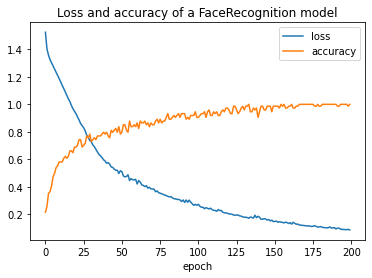

In [105]:
plt.plot(output.history['loss'])
plt.plot(output.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.title('Loss and accuracy of a FaceRecognition model')
plt.show()

In [106]:
model.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 251ms/step - loss: 0.0900 - accuracy: 1.0000


[0.08997400850057602, 1.0]